# Redes Neuronales Artificiales

#### Autor: Emilio Martínez Miranda

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer

In [2]:
cancer_mama = load_breast_cancer()

df = pd.DataFrame(data=cancer_mama.data, columns=cancer_mama.feature_names)
df['target'] = cancer_mama.target

df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
X = df.drop(columns=['target']) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

## Elegir modelo y arquitectura de la red neuronal.


Tipos de Modelos:
Sequential: Estructura de red neuronal básica y lineal. Las capas se apilan una encima de la otra de forma secuencial permitiendo un flujo de datos unidireccional desde la entrada hasta la salida. Esto es adecuado para casos en los que la información fluye en una sola dirección, como en la mayoría de los problemas de clasificación y regresión.

Functional Model: una alternativa al modelo Sequential que permite construir redes neuronales más complejas y con topologías no lineales. Permite la construcción de modelos con múltiples entradas y salidas, capas compartidas y conexiones más elaboradas entre las capas.

Subclass Model: modelos personalizados mediante la subclasificación de la clase Model.

Pretrained Models: modelos preentrenados como VGG16, VGG19, ResNet, Inception, etc. Estos modelos han sido entrenados en conjuntos de datos masivos y se pueden utilizar como punto de partida para tareas específicas de clasificación o detección de objetos.

Definición de la arquitectura de la red neuronal:
Se indica el número de capas con su respectivo número de neuronas en cada capa y la función de activación. En general, modelos más profundos (con más capas) tienen mayor capacidad de aprender características más abstractas y complejas. Sin embargo, un modelo demasiado profundo puede llevar a problemas de sobreajuste.

Se recomienda comenzar con una arquitectura simple y realizar ajustes basados en la evaluación del desempeño del modelo.

In [4]:
# input_shape solo para la primera

capa0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation = 'relu') 
capa1 = tf.keras.layers.Dense(units=32, activation = 'relu')
capa2 = tf.keras.layers.Dense(units=16, activation = 'relu')
capa3 = tf.keras.layers.Dense(units=1, activation = 'sigmoid')

modelo = tf.keras.Sequential([capa0, capa1, capa2, capa3])

modelo.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(0.1), metrics = ['accuracy'])

entrenamiento = modelo.fit(X_train, y_train, epochs=100, batch_size=32, verbose=False, validation_split=0.1)

evaluacion_modelo = modelo.evaluate(X_test, y_test)
print('Score:', evaluacion_modelo[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6316
Score: 0.6315789222717285


## Funciones de activación (más comunes):


linear: produce una salida proporcional a la entrada sin aplicar ninguna transformación no lineal. Se utiliza en modelos de regresión donde se requiere una salida continua.

sigmoid: produce una salida en un rango entre 0 y 1. Se utiliza en problemas de clasificación binaria.

relu: devuelve cero si es negativo, de lo contrario, devuelve el mismo valor de entrada.

Tanh: produce una salida en un rango entre -1 y 1. Se utiliza en problemas de clasificación y regresión

softmax: produce una distribución de probabilidad donde la suma de todas las salidas es igual a 1. Se utiliza en la capa de salida para problemas de clasificación multiclase.

## Parámetros

loss: función de pérdida (lo que se va a minimizar). Discrepancia entre las probabilidades predichas por el modelo y las etiquetas reales (y_train y y_test), así proporciona retroalimentación para ajustar los parámetros del modelo. 'binary_crossentropy' - clasificación binaria. 'mean_squared_error' - regresión

optimizer: ajusta los pesos y sesgos de las neuronas para minimizar la función de pérdida. (Adam, Adaptive Moment Estimation).

learning_rate: tamaño de paso al minimizar el error.

epochs: indica la cantidad de veces que se procesa todo el conjunto de datos. Durante cada "epoch", el modelo ajusta sus pesos y actualiza sus parámetros. Se recomienda entrenar el modelo durante múltiples "epochs" para que el modelo mejore gradualmente a medida que se expone a los datos de entrenamiento repetidamente.

batch_size: Durante el entrenamiento, los datos se dividen en lotes más pequeños o "batches", y el modelo realiza una actualización de los parámetros después de procesar cada "batch". Esto permite que el entrenamiento sea más eficiente desde el punto de vista computacional. Valores comunes son 32, 64 o 128.

La elección adecuada de estos parámetros depende de la naturaleza del problema, el conjunto de datos y las restricciones computacionales.

## _______________________________________________________________________________

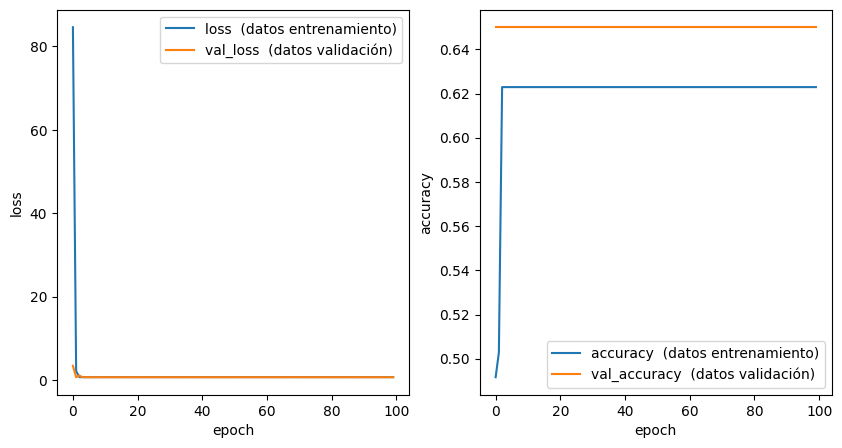

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(entrenamiento.history["loss"], label="loss  (datos entrenamiento)")
ax[0].plot(entrenamiento.history["val_loss"], label="val_loss  (datos validación)")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(entrenamiento.history["accuracy"], label="accuracy  (datos entrenamiento)")
ax[1].plot(entrenamiento.history["val_accuracy"], label="val_accuracy  (datos validación)")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend();

'loss' mide la discrepancia entre las predicciones y los valores reales en los datos de entrenamiento, mientras que 'val_loss' mide la discrepancia en datos no usados en el entrenamiento (validación).

## ________________________________________________________________________________

In [6]:
capa0 = tf.keras.layers.Dense(units=10, input_shape=([X.shape[1]]), activation = 'relu') 
capa1 = tf.keras.layers.Dense(units=1, activation = 'sigmoid')

modelo2 = tf.keras.Sequential([capa0, capa1])

6/6 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9357
Score: 0.9356725215911865


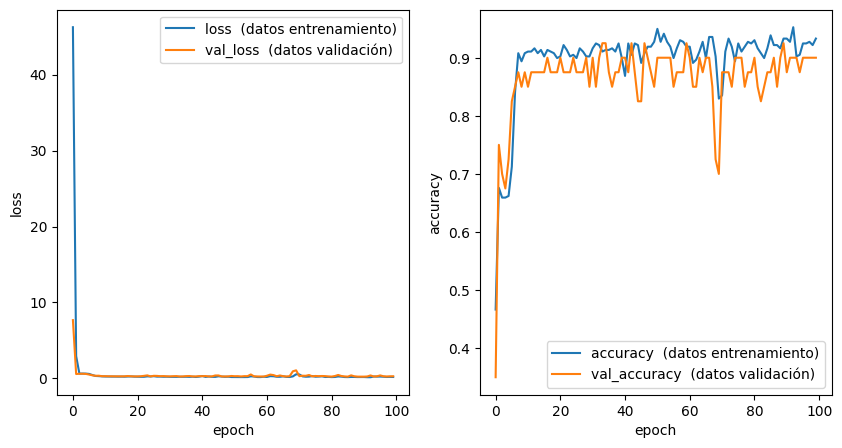

In [7]:
modelo2.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(0.1), metrics = ['accuracy'])

entrenamiento2 = modelo2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=False, validation_split=0.1)

evaluacion_modelo2 = modelo2.evaluate(X_test, y_test)
print('Score:', evaluacion_modelo2[1])

fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(entrenamiento2.history["loss"], label="loss  (datos entrenamiento)")
ax[0].plot(entrenamiento2.history["val_loss"], label="val_loss  (datos validación)")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(entrenamiento2.history["accuracy"], label="accuracy  (datos entrenamiento)")
ax[1].plot(entrenamiento2.history["val_accuracy"], label="val_accuracy  (datos validación)")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend();

## Ejemplo de Regresión Lineal

In [24]:
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

X = df[['bmi']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0.3)

In [25]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1], activation = 'linear')
redN_regLineal = tf.keras.Sequential([l0])
redN_regLineal.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.2), metrics = ['accuracy'])

redN_regLineal_hist = redN_regLineal.fit(X_train, y_train, epochs=100, verbose=False, validation_split=0.1)

In [26]:
from sklearn.metrics import r2_score

y_pred = redN_regLineal.predict(X_test)

r2_score(y_test, y_pred)

3/3 [==============================] - 0s 4ms/step


-0.02933802810234165

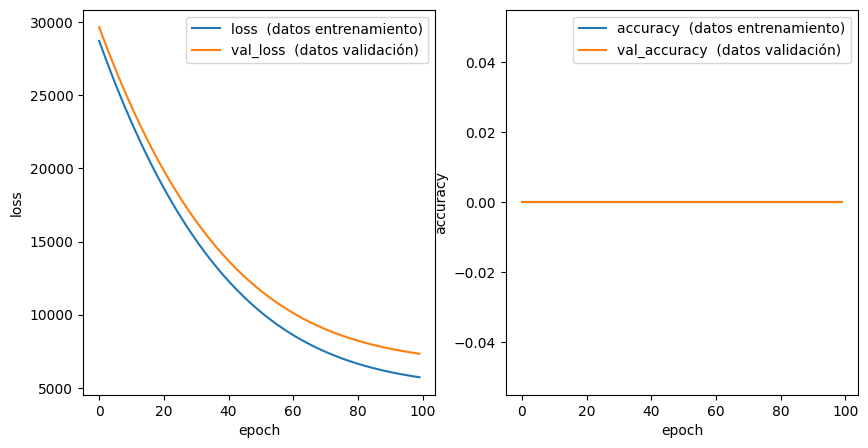

In [27]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(redN_regLineal_hist.history["loss"], label="loss  (datos entrenamiento)")
ax[0].plot(redN_regLineal_hist.history["val_loss"], label="val_loss  (datos validación)")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(redN_regLineal_hist.history["accuracy"], label="accuracy  (datos entrenamiento)")
ax[1].plot(redN_regLineal_hist.history["val_accuracy"], label="val_accuracy  (datos validación)")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()

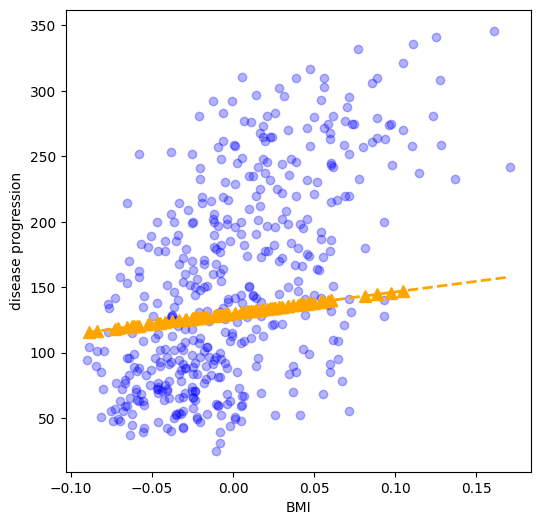

In [12]:
z = np.linspace(X.min(), X.max(), 100)
m, b =l0.get_weights() 

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X.values, y.values, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=2)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')
plt.show()

## Ejercicio


i) Modificar los parámetros del último ejemplo para obtener un mejor modelo

ii) incluir más variables

In [35]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

X = df[['bmi']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1], activation='linear')
NN_LinReg = tf.keras.Sequential([layer0])

NN_LinReg.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.6), metrics=['accuracy'])

NN_LinReg_hist = NN_LinReg.fit(X_train, y_train, epochs=200, verbose=False, validation_split=0.1)

In [54]:
y_pred = NN_LinReg.predict(X_test)

r2_score(y_test, y_pred)

3/3 [==============================] - 0s 2ms/step


0.2050760154345176

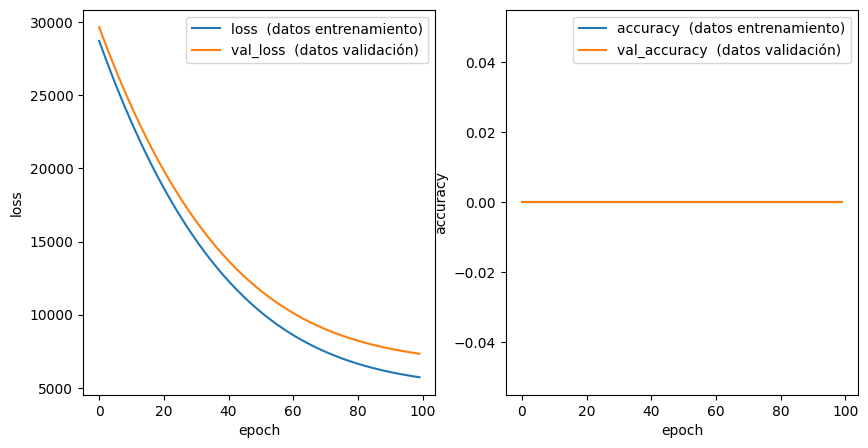

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(redN_regLineal_hist.history["loss"], label="loss  (datos entrenamiento)")
ax[0].plot(redN_regLineal_hist.history["val_loss"], label="val_loss  (datos validación)")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(redN_regLineal_hist.history["accuracy"], label="accuracy  (datos entrenamiento)")
ax[1].plot(redN_regLineal_hist.history["val_accuracy"], label="val_accuracy  (datos validación)")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend();

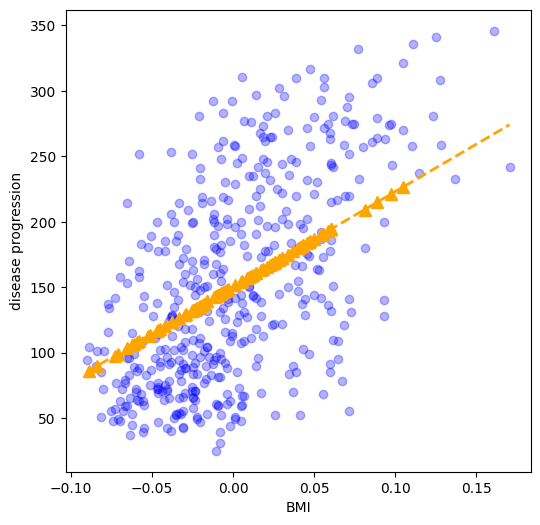

In [34]:
z = np.linspace(X.min(), X.max(), 100)
m, b =layer0.get_weights() 

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X.values, y.values, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=2)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')
plt.show()

## Procesamiento de imágenes

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data

class_names = ["T-shirt/Top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt", 
               "Sneaker", "Bag", "Ankle Boot"]

4422102/4422102 [==============================] - 1s 0us/step


In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

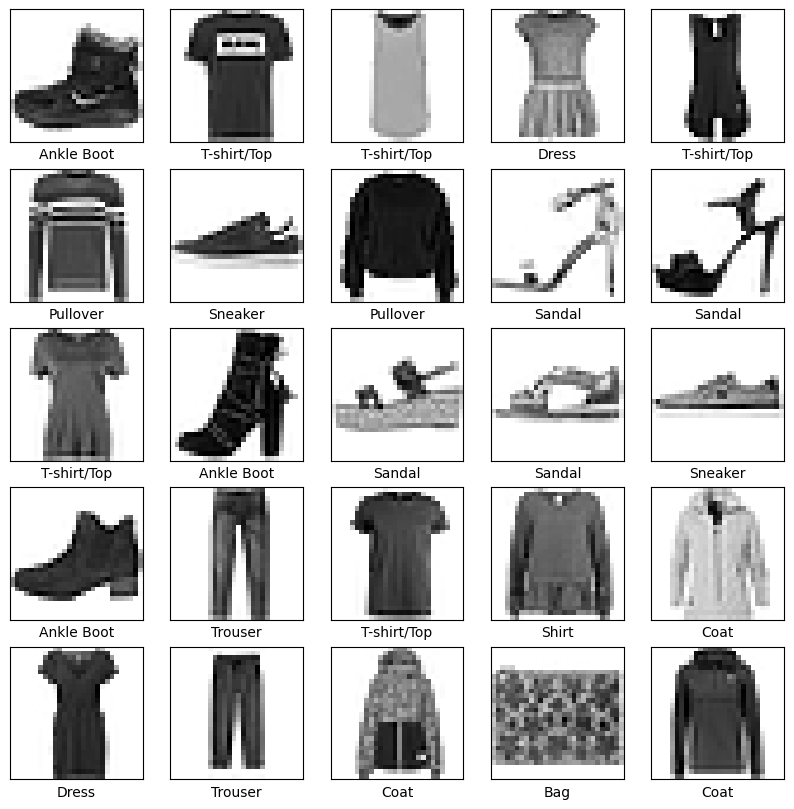

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [17]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [18]:
# normalización de la escala de valores

train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
# Flatten toma cada imagen de 28 x 28 y la convierte en un vector de 784 elementos
l0 = tf.keras.layers.Flatten(input_shape=(28, 28))
l1 = tf.keras.layers.Dense(128, activation='relu')
l2 = tf.keras.layers.Dense(32, activation='relu')
l3 = tf.keras.layers.Dense(10, activation='softmax')

In [20]:
model = tf.keras.Sequential([l0, l1, l2,l3])

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=10, verbose=False)

test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3457 - accuracy: 0.8815


In [21]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [22]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

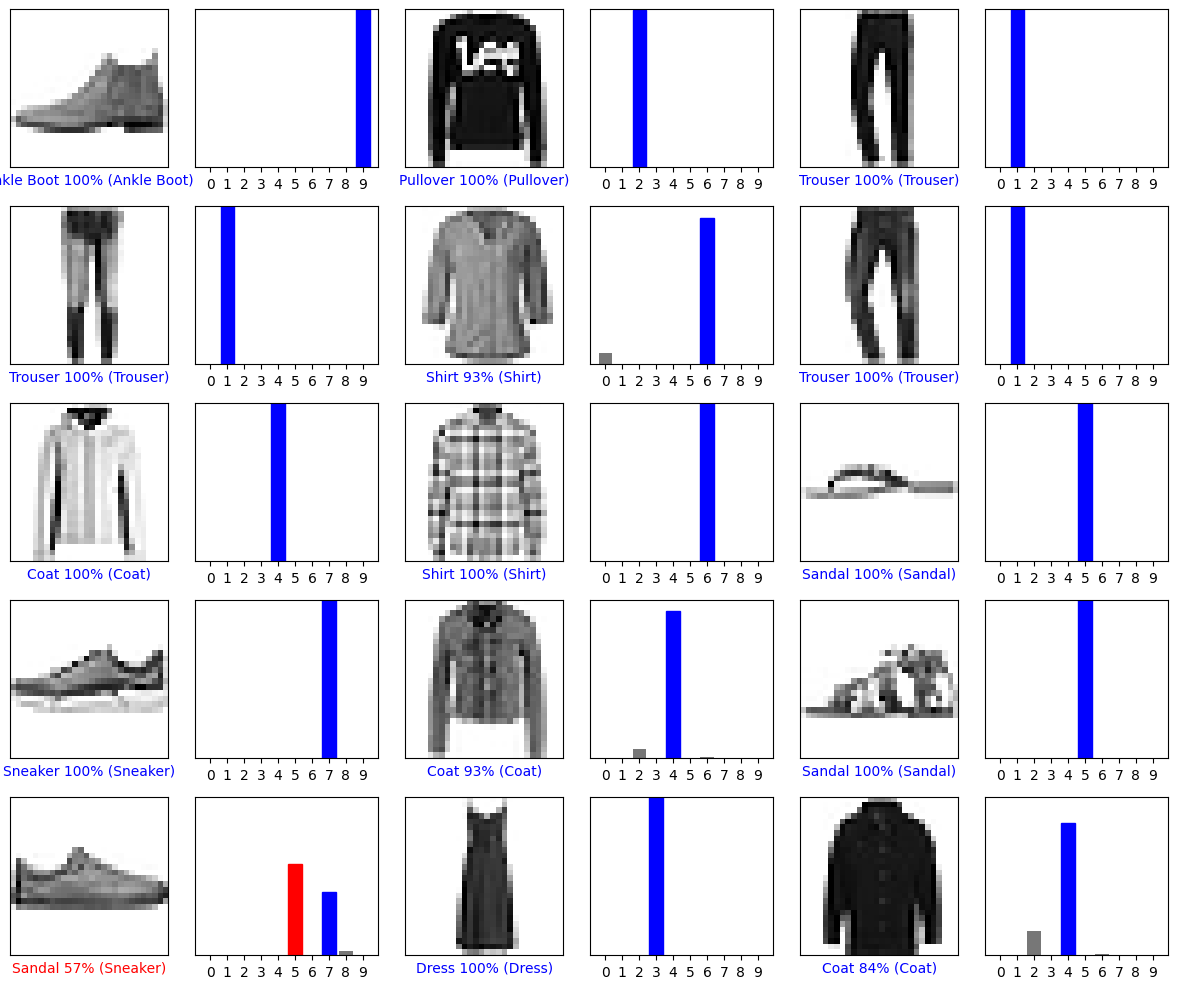

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()